In [191]:

import pandas as pd
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob


col_names=["City","Province"]
df=pd.read_csv(r"C:\Users\mc\Downloads\cities.csv",names=col_names, sep=";")
print(df.head())

def get_city_weather(city_name,province_name):
    url=f"https://www.weathersa.co.za/?city={city_name}"
    page_resp=requests.get(url)
    if page_resp.status_code==200:
        page_content=page_resp.text
    else:
        print(f"Could not get page:{page_resp.status_code}")
        return None
    
    soup=BeautifulSoup(page_content,"html.parser")
    
    try:
        humidity=soup.find("span", class_="pull-right humiditySide").text.strip()
        Min_Temperature=soup.find("span", class_="pull-right minSide celsi").text.strip()
        Max_Temperature=soup.find("span", class_="pull-right maxSide celsi").text.strip()
        Weather_Condition=soup.find("span", class_="pull-right cloudiSide").text.strip()
        Wind_Direction=soup.find("span", class_="pull-right windDirecSide").text.strip()
        Wind_Speed=soup.find("span", class_="pull-right windSpeedSide").text.strip()
        Rain_Amount=soup.find("span", class_="pull-right PrecipitationAmountSide").text.strip()
        Rain_Probability=soup.find("span", class_="pull-right PrecipitationPropabilitySide").text.strip()
        Sunrise_time=soup.find("span", class_="pull-right sunriseSide").text.strip()
        Sunset_time=soup.find("span", class_="pull-right sunsetSide").text.strip()
        
        
        return {
            "City":city_name,
            "Province":province_name,
            "Humidity(%)":humidity,
            "Min Temperature(Celcuis)":Min_Temperature,
            "Max Temperature(Celcuis)":Max_Temperature,
            "Weather Condition":Weather_Condition,
            "Wind Speed(km/h)":Wind_Speed,
            "Rain Amount":Rain_Amount,
            "Rain Probability":Rain_Probability,
            "Sunrise time":Sunrise_time,
            "Sunset time":Sunset_time
        }
            
    except AttributeError:
            print(f"Weather information of {city_name} not found")

            
weather_info=[]
            
            
for index,row in df.iterrows():
            city=row["City"]
            province=row["Province"]
            weather_data=get_city_weather(city, province)
            if weather_data:
                weather_info.append(weather_data)
            
weather_df=pd.DataFrame(weather_info)
print(weather_df.head())
weather_df.to_csv('weather_data.csv', index=False)


               City      Province
0      Johannesburg       Gauteng
1         Cape Town  Western Cape
2            Soweto       Gauteng
3  Pietermaritzburg           KZN
4            Durban           KZN
               City      Province Humidity(%) Min Temperature(Celcuis)  \
0      Johannesburg       Gauteng         60%                    15 °C   
1         Cape Town  Western Cape         80%                    17 °C   
2            Soweto       Gauteng         60%                    15 °C   
3  Pietermaritzburg           KZN        100%                    12 °C   
4            Durban           KZN         90%                    15 °C   

  Max Temperature(Celcuis)           Weather Condition Wind Speed(km/h)  \
0                    24 °C  Showers and Thundershowers      28 km/h   |   
1                    28 °C           high level clouds      37 km/h   |   
2                    25 °C  Showers and Thundershowers      28 km/h   |   
3                    25 °C  Showers and Thundershow

In [37]:

import pandas as pd
import numpy as np

df=pd.read_csv(r"C:\Users\mc\Downloads\weather_data.csv", sep=",")

#1.Change of datatypes of numerical value
df["Humidity(%)"]=df["Humidity(%)"].str.replace("%","")
df["Humidity(%)"]=pd.to_numeric(df["Humidity(%)"])
df["Min Temperature(Celcuis)"]=df["Min Temperature(Celcuis)"].str.replace("°C","")
df["Min Temperature(Celcuis)"]=pd.to_numeric(df["Min Temperature(Celcuis)"])
df["Max Temperature(Celcuis)"]=df["Max Temperature(Celcuis)"].str.replace("°C","")
df["Max Temperature(Celcuis)"]=pd.to_numeric(df["Max Temperature(Celcuis)"])
df["Rain Probability"]=df["Rain Probability"].str.replace("%","")
df["Rain Probability"]=pd.to_numeric(df["Rain Probability"])
df["Wind Speed(km/h)"]=df["Wind Speed(km/h)"].str.replace("km/h","").str.replace(" ","").str.replace("|","").astype(int)
df["Rain Amount"]=df["Rain Amount"].str.replace("mm","").astype(int)
df["Sunrise time"]=pd.to_datetime(df["Sunrise time"])
df["Sunset time"]=pd.to_datetime(df["Sunset time"])
print("New numeric datatypes:")
print(df.dtypes)

#2. Avg temps. new column
print("\n")
print("Avg temps. new column")
df2=df[["Min Temperature(Celcuis)","Max Temperature(Celcuis)"]]
df["Average Temperature"]=df2.mean(axis=1)
print(df.head())

#3. New df
print("\n")
print("New dataframe: ")
newdf=df[["Province","Min Temperature(Celcuis)","Max Temperature(Celcuis)","Average Temperature"]]
new_df=pd.DataFrame(newdf)
new_df.set_index("Province", inplace=True)
print(new_df.head())

#4. 2 new dfs(top 5 min and max avg. temps.)
print("\n")
print("Dataframe of 5 highest average temperatures")
df_high=df[["Average Temperature"]]
df_highest=pd.DataFrame(df_high)
print(df_highest.nlargest(5,"Average Temperature"))

print("\n")
print("Dataframe of 5 lowest average temperatures")
df_low=df[["Average Temperature"]]
df_lowest=pd.DataFrame(df_low)
print(df_highest.nsmallest(5,"Average Temperature"))


#5. Zero rainfall prob. cities
print("\n")
print("Cities with 0% rainfall probablity: ")
zero_rain_prob=df[df["Rain Probability"]==0]
print(zero_rain_prob)

#6
print("\n")
print("Hottest city with rainfall")
cities_with_rainfall=df[df["Rain Probability"]>0]
hottest_raining_city=cities_with_rainfall.loc[cities_with_rainfall["Average Temperature"].idxmax()]
print(hottest_raining_city)

New numeric datatypes:
City                                object
Province                            object
Humidity(%)                          int64
Min Temperature(Celcuis)             int64
Max Temperature(Celcuis)             int64
Weather Condition                   object
Wind Speed(km/h)                     int32
Rain Amount                          int32
Rain Probability                     int64
Sunrise time                datetime64[ns]
Sunset time                 datetime64[ns]
dtype: object


Avg temps. new column
               City      Province  Humidity(%)  Min Temperature(Celcuis)  \
0      Johannesburg       Gauteng           40                        13   
1         Cape Town  Western Cape           40                        15   
2            Soweto       Gauteng           40                        13   
3  Pietermaritzburg           KZN           90                        10   
4            Durban           KZN           80                        15   

   Max Te

C:\Users\mc\AppData\Local\Temp\ipykernel_11276\296946788.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Sunrise time"]=pd.to_datetime(df["Sunrise time"])
C:\Users\mc\AppData\Local\Temp\ipykernel_11276\296946788.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Sunset time"]=pd.to_datetime(df["Sunset time"])


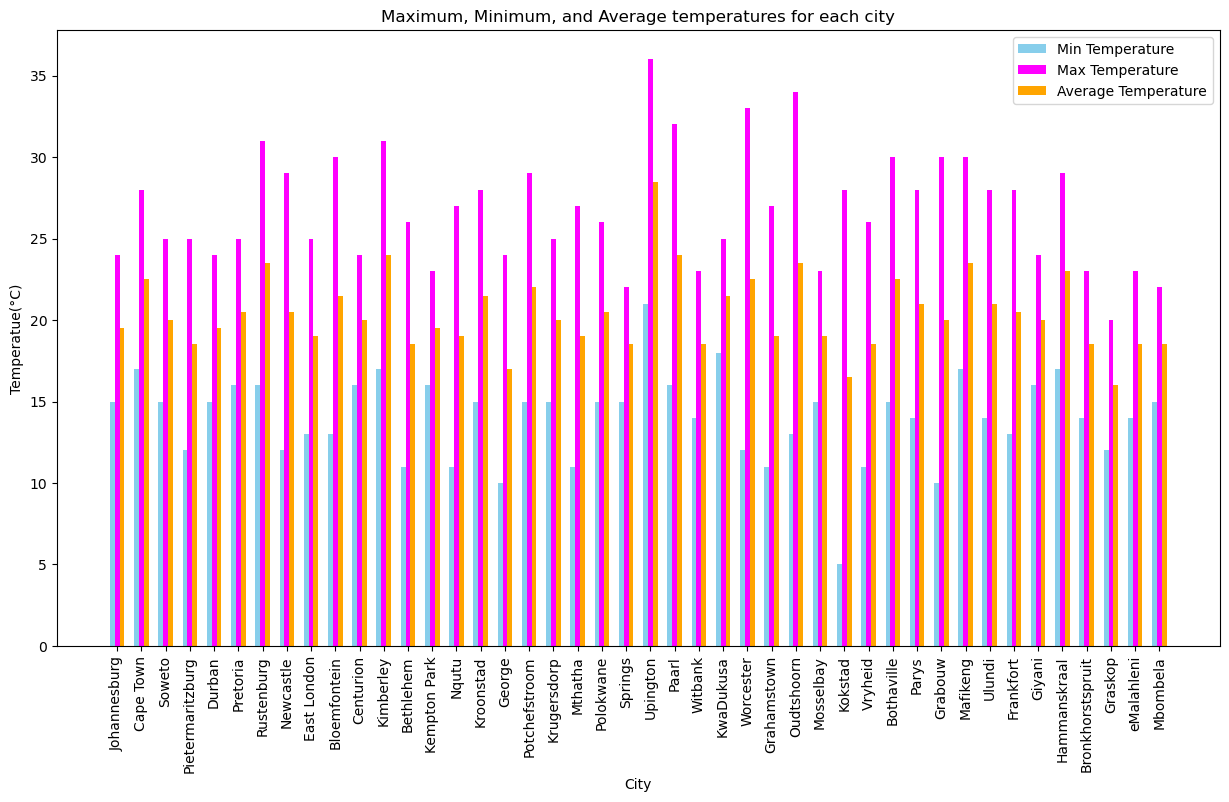

In [192]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#1.chart showing the maximum, minimum, and average temperatures for each city.
df=pd.read_csv(r"C:\Users\mc\Downloads\weather_data.csv", sep=",")
df["Min Temperature(Celcuis)"]=df["Min Temperature(Celcuis)"].str.replace("°C","")
df["Min Temperature(Celcuis)"]=pd.to_numeric(df["Min Temperature(Celcuis)"])
df["Max Temperature(Celcuis)"]=df["Max Temperature(Celcuis)"].str.replace("°C","")
df["Max Temperature(Celcuis)"]=pd.to_numeric(df["Max Temperature(Celcuis)"])
df2=df[["Min Temperature(Celcuis)","Max Temperature(Celcuis)"]]
df["Average Temperature"]=df2.mean(axis=1)

#plotting
plt.figure(figsize=(15,8))
x=np.arange(len(df["City"]))
y1=df["Min Temperature(Celcuis)"]
y2=df["Max Temperature(Celcuis)"]
y3=df["Average Temperature"]
w=0.2


plt.bar(x-w,y1,width=w,label="Min Temperature",color="skyblue")
plt.bar(x,y2,width=w,label="Max Temperature", color="magenta")
plt.bar(x+w,y3,width=w,label="Average Temperature", color="orange")

plt.xlabel("City")
plt.ylabel("Temperatue(°C)")
plt.xticks(x,df["City"],rotation=90)
plt.title("Maximum, Minimum, and Average temperatures for each city")
plt.legend()
plt.show()







New dataframe: 
              Min Temperature(Celcuis)  Max Temperature(Celcuis)  \
Province                                                           
Gauteng                             15                        24   
Western Cape                        17                        28   
Gauteng                             15                        25   
KZN                                 12                        25   
KZN                                 15                        24   

              Average Temperature  
Province                           
Gauteng                      19.5  
Western Cape                 22.5  
Gauteng                      20.0  
KZN                          18.5  
KZN                          19.5  


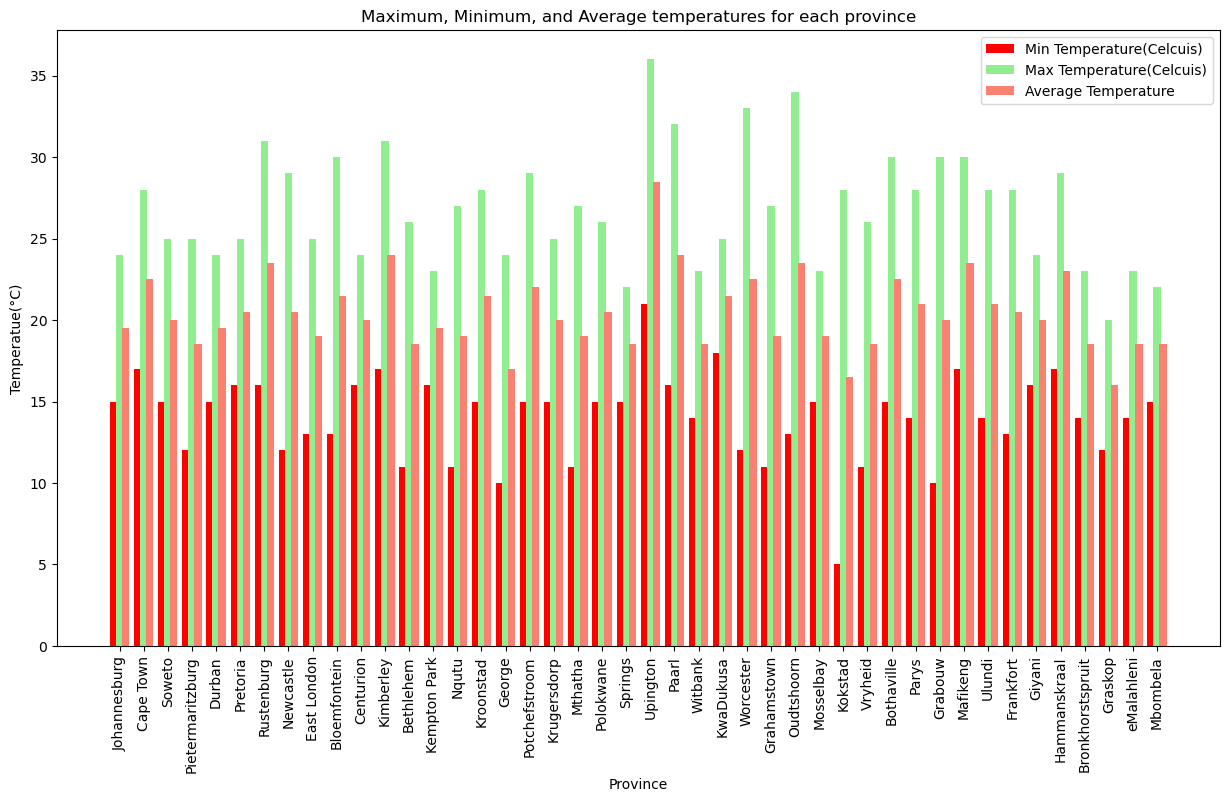

In [193]:
#2.chart showing the maximum, minimum and mean average temperatures per province.
print("\n")
print("New dataframe: ")
newdf=df[["Province","Min Temperature(Celcuis)","Max Temperature(Celcuis)","Average Temperature"]]
new_df=pd.DataFrame(newdf)
new_df.set_index("Province", inplace=True)
print(new_df.head())

x=np.arange(len(df["Province"]))
y1=df["Min Temperature(Celcuis)"]
y2=df["Max Temperature(Celcuis)"]
y3=df["Average Temperature"]

plt.figure(figsize=(15,8))
w=0.3

plt.bar(x-0.25,y1,width=w, label="Min Temperature(Celcuis)", color="red")
plt.bar(x,y2,width=w,label="Max Temperature(Celcuis)",color="lightgreen")
plt.bar(x+0.25,y3,width=w,label="Average Temperature", color="salmon")

plt.xlabel("Province")
plt.ylabel("Temperatue(°C)")
plt.xticks(x,df["City"],rotation=90)
plt.title("Maximum, Minimum, and Average temperatures for each province")
plt.legend()
plt.show()




Dataframe of 5 highest average temperatures
          City  Average Temperature
22    Upington                 25.5
23       Paarl                 25.0
6   Rustenburg                 24.5
35    Mafikeng                 24.5
32  Bothaville                 23.5


Dataframe of 5 lowest average temperatures
                City  Average Temperature
30           Kokstad                 10.5
3   Pietermaritzburg                 13.0
19           Mthatha                 13.0
27       Grahamstown                 13.0
41           Graskop                 13.5


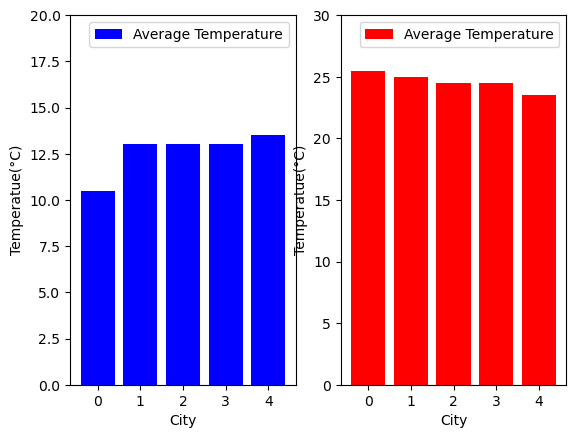

In [125]:
#3. Subplots showing the cities with the 5 lowest and 5 highest temperatures.


print("\n")
print("Dataframe of 5 highest average temperatures")
df_high=df[["City","Average Temperature"]]
df_highest=pd.DataFrame(df_high)
df_temp_city_highest=df_highest.nlargest(5,"Average Temperature")
print(df_temp_city_highest)

print("\n")
print("Dataframe of 5 lowest average temperatures")
df_low=df[["City","Average Temperature"]]
df_lowest=pd.DataFrame(df_low)
df_temp_city_lowest=df_highest.nsmallest(5,"Average Temperature")
print(df_temp_city_lowest)

x1=np.arange(len(df_temp_city_lowest["City"]))
y1=df_temp_city_lowest["Average Temperature"]
x2=np.arange(len(df_temp_city_highest["City"]))
y2=df_temp_city_highest["Average Temperature"]

fig,ax=plt.subplots(1,2)

plot1=ax[0].bar(x1,y1,label="Average Temperature", color="blue")
plot2=ax[1].bar(x2,y2,label="Average Temperature", color="red")
ax[0].set_xlabel("City")
ax[1].set_xlabel("City")
ax[0].set_ylabel("Temperatue(°C)")
ax[1].set_ylabel("Temperatue(°C)")
ax[0].set_ylim(0,20)
ax[1].set_ylim(0,30)

ax[0].set_xticks(x1)
ax[1].set_xticks(x2)
ax[0].legend()
ax[1].legend()




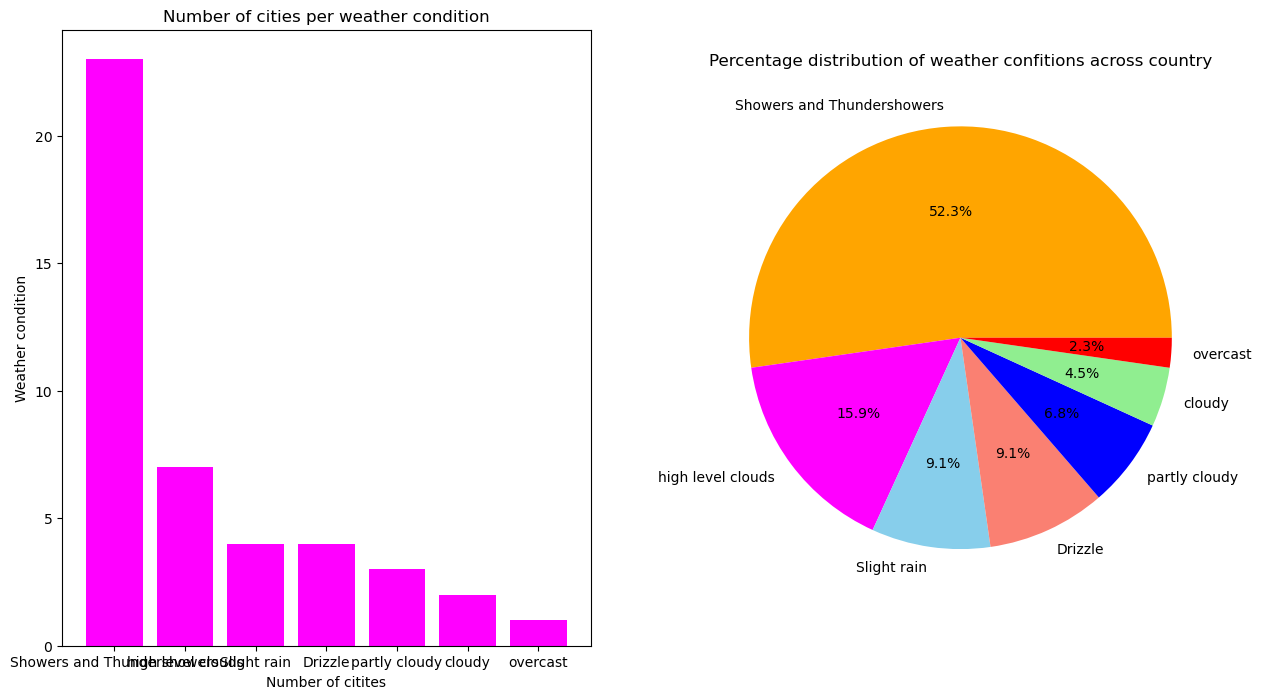

In [138]:
#4.Subplots showing the number of cities that fall under each weather condition, 
#and the percentage distribution of weather conditions across the countr

df=df[["Weather Condition","City"]]
weather_type_count=df["Weather Condition"].value_counts()
colors=["orange","magenta","skyblue","salmon","blue","lightgreen","red"]

fig,ax=plt.subplots(1,2,figsize=(15,8))
ax[0].bar(weather_type_count.index,weather_type_count.values,color="magenta")
ax[0].set_xlabel("Number of citites")
ax[0].set_ylabel("Weather condition")
ax[0].set_title("Number of cities per weather condition")
ax[1].pie(weather_type_count.values, labels=weather_type_count.index,autopct="%1.1f%%",startangle=0,colors=colors)
ax[1].set_title("Percentage distribution of weather confitions across country")
plt.show()



    Distance_Feature  Speeding_Feature
0              71.24                28
1              52.53                25
2              64.54                27
3              55.69                22
4              54.58                25
5              41.91                10
6              58.64                20
7              52.02                 8
8              31.25                34
9              44.31                19
10             49.35                40
11             58.07                45
12             44.22                22
13             55.73                19
14             46.63                43
15             52.97                32


C:\Users\mc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

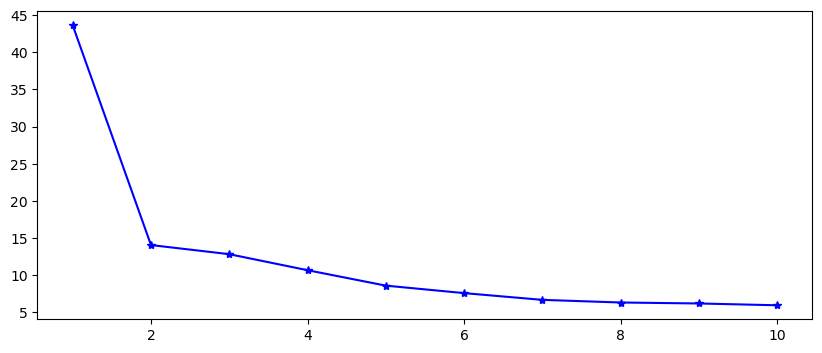

C:\Users\mc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Accuracy: 0.03
Class report:               precision    recall  f1-score   support

           0       0.00      0.35      0.01        23
           1       0.04      0.24      0.06       120
           2       0.05      0.47      0.09       177
           3       0.00      0.00      0.00       353
           4       0.00      0.00      0.00       503
           5       0.00      0.00      0.00       553
           6       0.00      0.00      0.00       524
           7       0.00      0.00      0.00       366
           8       0.00      0.00      0.00       241
           9       0.00      0.00      0.00       152
          10       0.00      0.00      0.00        85
          11       0.00      0.00      0.00        62
          12       0.00      0.00      0.00        47
          13       0.00      0.00      0.00        40
          14       0.00      0.00      0.00        50
          15       0.00      0.00      0.00        48
          16       0.00      0.00      0.00        3

IndexError: index 1 is out of bounds for axis 1 with size 1

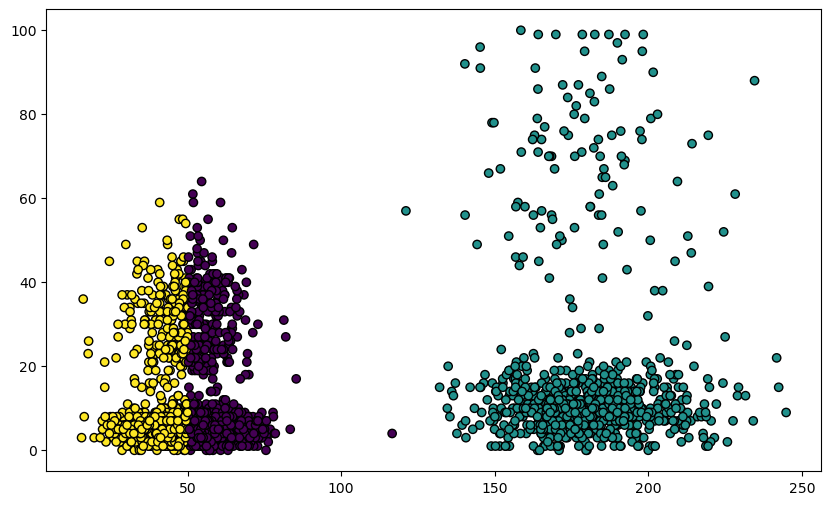

In [187]:
#QUESTION 4:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist,pdist

df=pd.read_csv(r"C:\Users\mc\Downloads\driver_details.csv")
df=df.drop(columns=["Driver_ID"])
df=df.dropna()
print(df.head(16))

x=df
K=range(1,11)

KM=[KMeans(n_clusters=k).fit(x) for k in K]
centroid=[k.cluster_centers_ for k in KM]
D_k=[cdist(x,centr) for centr in centroid]
cIdx=[np.argmin(D, axis=1) for D in D_k]
dist=[np.min(D, axis=1) for D in D_k]

avgWithinSS=[sum(d)/x.shape[0] for d in dist]
wcss=[sum(d**2)/x.shape[0] for d in dist]

plt.figure(figsize=(10,4))
plt.subplot()
plt.plot(K, avgWithinSS,"b*-")
plt.show()



df=df
x=df.iloc[:,0]
x=x.values.reshape(-1,1)
scaler=StandardScaler()
scaler.fit(x)
x=scaler.transform(x)
kmeans=KMeans(n_clusters=3, random_state=11)
kmeans.fit(x)
df["Predicted speeds"]=kmeans.labels_
accuracy=accuracy_score(df["Speeding_Feature"],df["Predicted speeds"])
class_report=classification_report(df["Speeding_Feature"],df["Predicted speeds"])
conf_matrix=confusion_matrix(df["Speeding_Feature"],df["Predicted speeds"])

print(f"Accuracy: {accuracy}")
print(f"Class report: {class_report}")
print("Confusion matrix:")
print(conf_matrix)


centroids=scaler.inverse_transform(kmeans.cluster_centers_)
plt.figure(figsize=(10,6))
scatter=plt.scatter(df["Distance_Feature"],df["Speeding_Feature"],c=df["Predicted speeds"],cmap='viridis', marker='o', edgecolor='k')
plt.scatter(centroids[:0],centroids[:,1], s=200, c='red', marker='X', label='Centroids')

plt.xlabel('Distance')
plt.ylabel('Speed')
plt.title('Clusters of Distance and Speed with Centroids')
plt.legend()
plt.colorbar(scatter, label='Cluster')
plt.show()